In [1]:
import warnings
import scanpy as sc
import squidpy as sq
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from urllib import request
import scanorama
import json
import os

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

## Load Files

In [22]:
dir_path = '../data/anndata_objects/'

In [23]:
os.listdir(dir_path)

['chimp', 'human', 'macaque', 'spatial_libd_human']

In [33]:
files = ['human/human_j6.h5ad', 'chimp/chimp_11454.h5ad', 'macaque/macaque_0703.h5ad']
adata_list = [sc.read_h5ad(dir_path + file) for file in files]
adata = an.concat(adata_list, merge='same',uns_merge="unique")
adata

C:\Users\aleks\anaconda3\envs\scanorama39\lib\site-packages\anndata\_core\anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 11111 × 15585
    obs: 'in_tissue', 'array_row', 'array_col', 'label', 'sample_id'
    var: 'feature_types'
    uns: 'spatial'
    obsm: 'spatial'

## Histological images

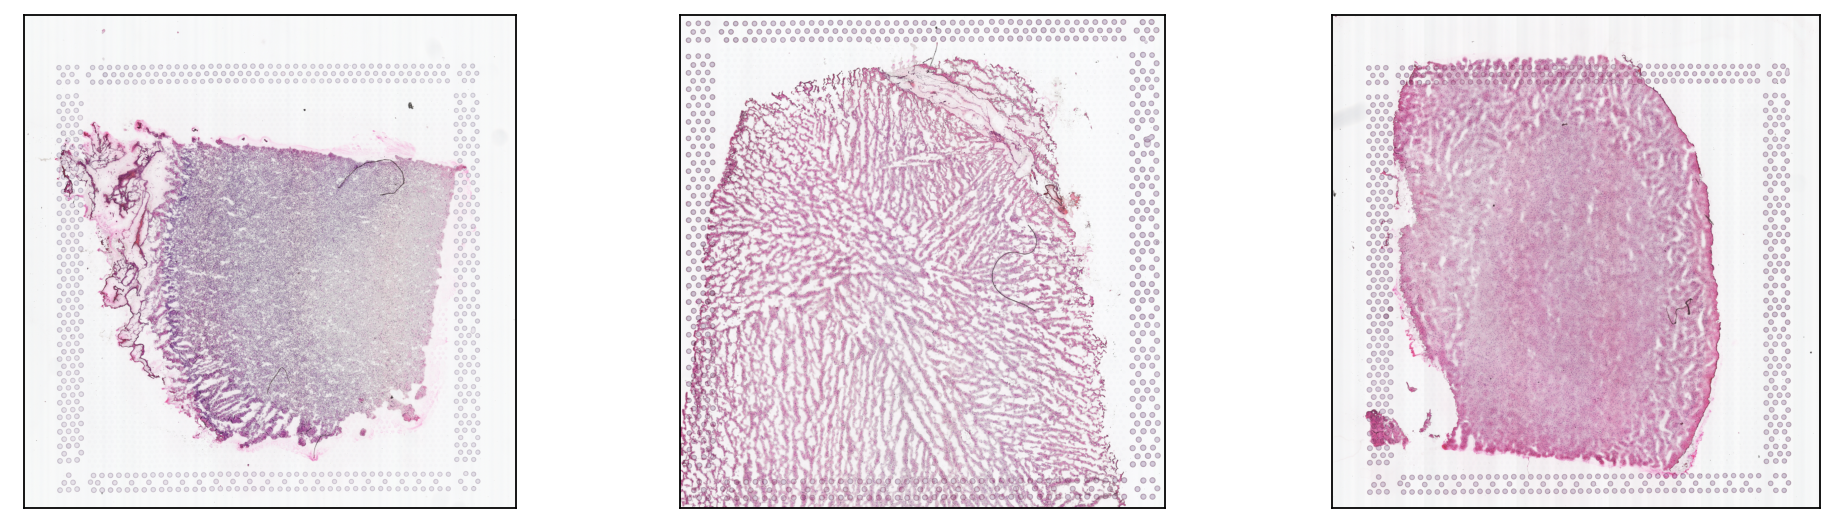

In [44]:
sq.pl.spatial_scatter(adata, library_key='sample_id', axis_label=['', ''], save='slides.pdf')

## Layer Segmentation

In [41]:
adata = adata[adata.obs.label != 'Empty spots']

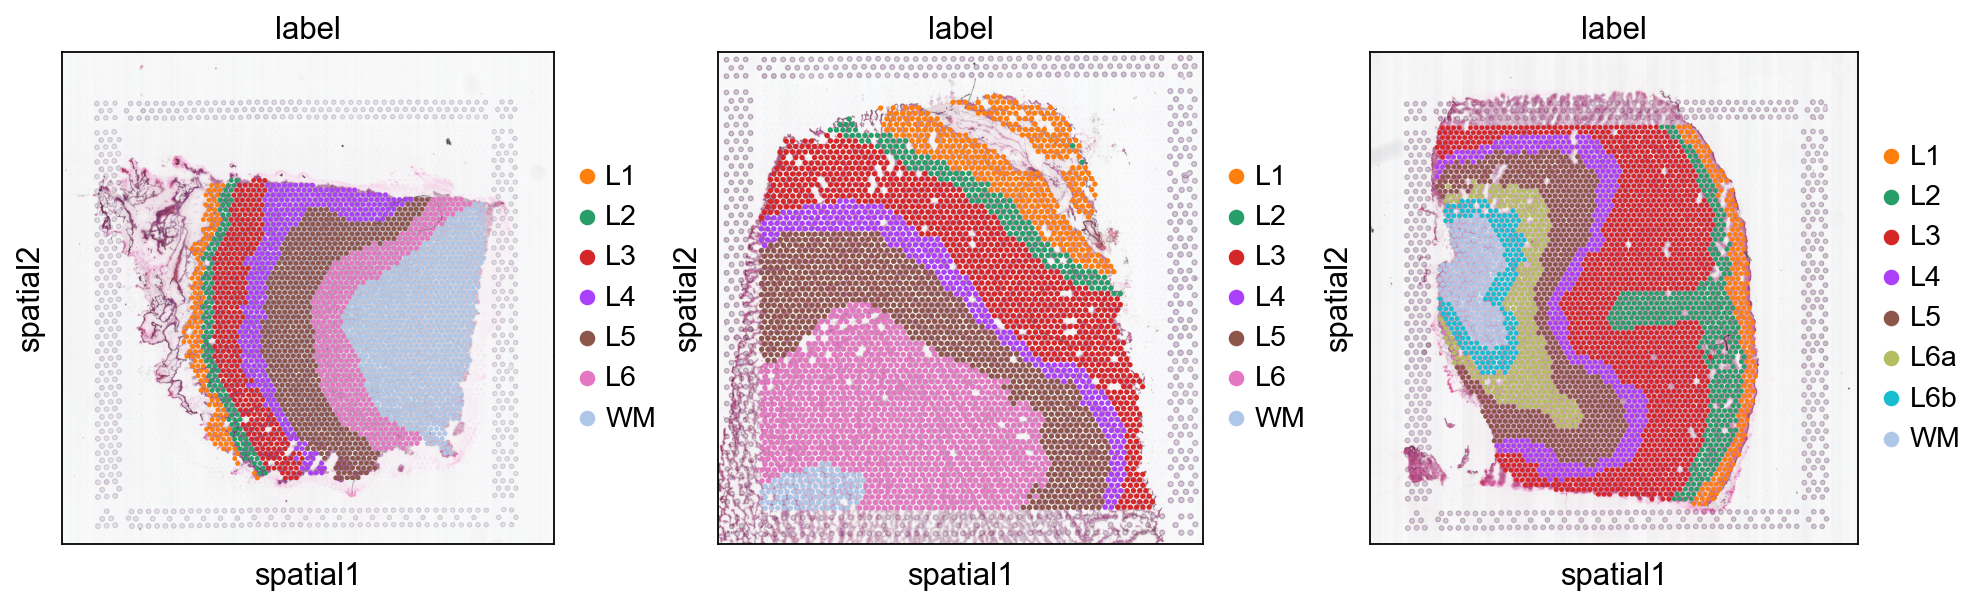

In [45]:
sq.pl.spatial_scatter(adata, color=['label'], library_key='sample_id', ncols=3, size=1.3, save='slides_segmentation.pdf')